<img src='./images/film_logo.jpeg' style='float:left; width:200px;height:200px'/>

#  <h1><center> Capstone Project: Film Linguistics </center></h1>
#  Notebook 3a - Linear Regression with Principal Component Analysis (PCA)
####  Stephen Strawbridge, Cohort #1019

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import from sklearn.
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Read in cleaned dataset
df = pd.read_csv('./CSVs/cleaned_df.csv');

In [3]:
df = df.drop(columns='Unnamed: 0')
df.head()

,MovieID,IDSubtitleFile,IDSubtitle,MovieName,MovieYear,SubDownloadsCnt,TotalWords,HarmVirtue,HarmVirtue-ratio,HarmVice,...,Relig-ratio,Death,Death-ratio,Informal,Informal-ratio,Swear,Swear-ratio,Filler,Filler-ratio,years_old
0,6247,141146,102946,Jan Dara,2001,4094,4352,3,0.000689,10,...,0.002757,14,0.003217,67,0.015395,34,0.007813,1,0.000230,20
1,70811,1953655263,5113335,Pocahontas,1995,81,6315,8,0.001267,39,...,0.003959,25,0.003959,68,0.010768,2,0.000317,0,0.000000,26
2,38254,1952519756,3855025,Space Chimps,2008,45,7435,10,0.001345,8,...,0.002824,17,0.002286,340,0.045730,5,0.000672,62,0.008339,13
3,150,1953609111,5067084,A Bug's Life,1998,213,7932,8,0.001009,12,...,0.001009,18,0.002269,461,0.058119,8,0.001009,24,0.003026,23
4,4150,1953020828,4460230,Babe,1995,186,6176,4,0.000648,12,...,0.003400,10,0.001619,171,0.027688,5,0.000810,7,0.001133,26


## Section 1 - Create Features
---

#### Create Features for Model

In [4]:
#First create list of all ratio columns to use
ratio_cols = [col for col in df.columns if 'ratio' in col]


#Create list of all the dummified genres to include in features
genres = ['drama', 'comedy', 'romance', 'action', 'crime', 'mystery', 'western', 'animation', 'thriller',
         'biography', 'adventure', 'horror', 'fantasy', 'musical', 'war', 'sport', 'documentary', 'family',
         'short', 'music', 'history', 'adult', 'news']

#All of features to include in model
other_feats = ['years_old']

#Create features list
features = ratio_cols + genres + other_feats

#Create dataframe for features
X = df[features]

In [5]:
#Create array for target variable ('rating_rank')
y = df['rating_rank']

### Apply polynomial features
---

In [6]:
#Instantiate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

#Apply polynomial features transformer to X
X = poly.fit_transform(X)

In [7]:
#Check out new dataframe
X_poly_df = pd.DataFrame(X, columns=poly.get_feature_names(features))
X_poly_df.head()

,HarmVirtue-ratio,HarmVice-ratio,FairnessVirtue-ratio,FairnessVice-ratio,IngroupVirtue-ratio,IngroupVice-ratio,AuthorityVirtue-ratio,AuthorityVice-ratio,PurityVirtue-ratio,PurityVice-ratio,...,history^2,history adult,history news,history years_old,adult^2,adult news,adult years_old,news^2,news years_old,years_old^2
0,0.000689,0.002298,0.000000,0.000000,0.000919,0.000230,0.016774,0.000000,0.000689,0.001379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400.0
1,0.001267,0.006176,0.000158,0.000000,0.000950,0.001108,0.003325,0.000475,0.000633,0.001108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.0
2,0.001345,0.001076,0.000403,0.000000,0.000672,0.000403,0.003228,0.000672,0.000269,0.000269,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169.0
3,0.001009,0.001513,0.000126,0.000000,0.000630,0.000252,0.002774,0.000000,0.000000,0.000252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0
4,0.000648,0.001943,0.000486,0.000162,0.001457,0.000486,0.001295,0.000648,0.000162,0.000324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,676.0


In [8]:
# Train-test-split data.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

## Section 2 - PCA
---

#### Standardize Data (as needed in PCA)

In [9]:
# Instantiate our StandardScaler.
ss = StandardScaler()

# Standardize X_train.
X_train = ss.fit_transform(X_train)

# Standardize X_test.
X_test = ss.transform(X_test)

#### Apply PCA

In [10]:
# Instantiate PCA.
pca = PCA(n_components=200, random_state=42)

# Fit PCA on the training data.
pca.fit(X_train)

# Transform PCA on the training data.
Z_train = pca.transform(X_train)

# Transform PCA on the testing data.
Z_test = pca.transform(X_test)

#For presentation purposes, create dataframe with z-scores for each column
df_pca = pd.DataFrame(Z_train)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,7.447229,2.291524,-9.695610,-1.142147,-4.355656,5.853726,-3.598641,1.525353,-2.507218,-0.358436,...,0.373998,-0.682774,0.402233,-0.091428,0.458356,-0.590653,0.953059,0.330567,0.374186,-0.922254
1,-12.195560,1.954258,1.886734,3.205723,6.944745,-1.322951,-5.538750,4.886860,-0.213822,8.952564,...,1.719340,-2.435705,1.789233,-0.308577,1.106037,0.493379,-0.114196,1.170932,-0.089598,0.774535
2,19.943973,13.503240,2.703209,-4.914985,1.073047,-9.472180,-1.345059,-1.050349,4.526116,1.381097,...,0.297120,-0.456274,-0.102478,0.473747,0.516356,-0.019286,-0.370383,0.105300,0.246600,-0.088740
3,-9.208297,3.934053,10.840252,-4.106372,-8.929296,5.002403,0.013712,1.071446,2.554384,-2.400065,...,1.404964,1.410377,0.272035,0.536683,-1.369251,2.210382,0.235025,0.289629,1.725479,0.939944
4,6.377737,3.941371,-0.597130,-15.009644,16.298467,9.418009,-14.581653,3.557192,8.359874,4.208570,...,2.334364,1.419833,-2.193041,-5.396834,2.050980,-0.599439,-6.259482,1.141717,0.004223,-5.828152


Each one of these columns (Z-features) is a combination of all of the other original features in the dataframe<br>
Each cell is an individual weight.

In [11]:
#Check out explained variance ratios of 20 most important principal components
pca.explained_variance_ratio_[:20]

array([0.05774049, 0.05469701, 0.03729681, 0.03286618, 0.03078571,
       0.02599983, 0.02022308, 0.01979989, 0.01886455, 0.01871061,
       0.0182682 , 0.01788507, 0.01712904, 0.01706962, 0.01679384,
       0.01656159, 0.01588096, 0.01527275, 0.01481404, 0.01475213])

#### As illustrated in the explained variance ratios above,  there were no single principal components that held most of the predictive value in the dataset, but nonetheless, PCA was able to improve the model scores below.

## Section 3 - Linear Regression Model
---

In [12]:
#Fit linear regression
lr = LinearRegression()
lr.fit(Z_train, y_train)

train_score = round(lr.score(Z_train, y_train), 5)
test_score = round(lr.score(Z_test, y_test), 5)

print(f'Training R-squared: {train_score}')
print(f'Testing R-squared: {test_score}')

Training R-squared: 0.33726
Testing R-squared: 0.29829


In [13]:
#Create predictions and residuals variables
preds = lr.predict(Z_test)
resids = y_test - preds

In [14]:
test_RMSE = round(metrics.mean_squared_error(y_test, preds, squared=False), 5)
print(f'Testing RMSE: {test_RMSE}')

Testing RMSE: 0.94784


In [15]:
#Baseline RMSE (source code leveraged from https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html)
null_pred = np.zeros_like(y_test)
null_pred = null_pred + y_test.mean()
base_RMSE = round(metrics.mean_squared_error(y_test, null_pred, squared=False), 5)

print(f'Baseline RMSE: {base_RMSE}')

Baseline RMSE: 1.13151


In [16]:
#How much better is our testing RMSE than baseline RMSE
under_base = round(base_RMSE/test_RMSE, 4)
print(f'Model is {under_base} times better than baseline model')

Model is 1.1938 times better than baseline model


In [17]:
#How much was our RMSE reduced in percentage terms
below_base = round(((base_RMSE - test_RMSE)/base_RMSE)*100, 3)
print(f'RMSE was reduced by {below_base}%')

RMSE was reduced by 16.232%


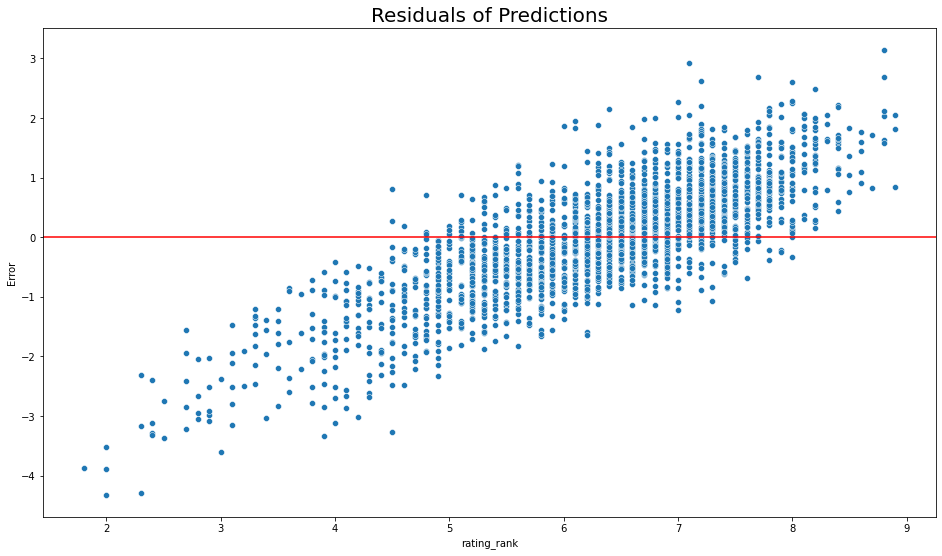

In [18]:
#Plot residuals

plt.figure(figsize=(16,9))
sns.scatterplot(x=y_test, y=resids)
plt.title('Residuals of Predictions', fontsize=20)
plt.ylabel('Error');
plt.axhline(0, color='r');

#### Interesting Note:  The residuals seem to follow a *linear* pattern.  Throughout all the data, the model seems to generally seems to underestimate very poorly ranked movies and very highly ranked movies (e.g. model gives predictions that are more closely centered around the mean).

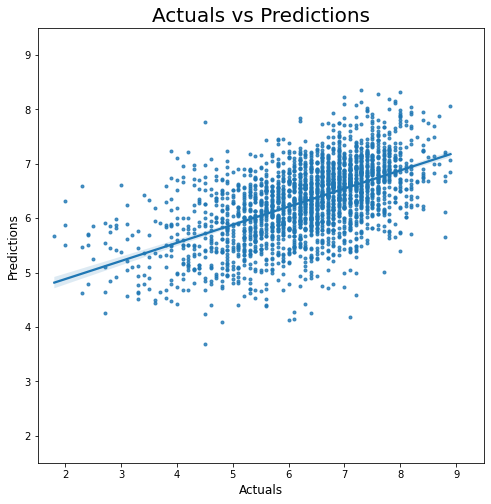

In [19]:
plt.figure(figsize=(8,8))
plt.title('Actuals vs Predictions', fontsize=20);

sns.regplot(x=y_test, y=preds, data=Z_test, marker='.');

plt.xlim(1.5, 9.5)
plt.ylim(1.5, 9.5)
plt.xlabel('Actuals', fontsize=12);
plt.ylabel('Predictions', fontsize=12);

#### As seen in graph above, our predictions fall in the range of about 4 to 8.5 rating rank.  Although this is a small range as compared to the actual range, it does make sense, as the distribution of actual rating ranks is very steep (e.g. only a very small percentage of movies fall below a 4 or above an 8.5 on the rating rank).